In [224]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as skl
import matplotlib as mp
import seaborn as sn
import statistics as stats


import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Load data and data inspection

In [225]:
# load data
house_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [226]:
#data inspection
house_data.shape

(1460, 81)

There are 1460 rows and 81 columns 

In [227]:
# drop duplicates
house_data.drop_duplicates().shape[0] == house_data.shape[0]

True

There is no duplicated rows in data

## Drop Id and SalePrice from features 

In [228]:
# create target feature
target = house_data.SalePrice

# remove id and target columns

house_data1 = house_data.drop(columns=['Id'],axis = 1)

# check
house_data1.shape[1]==house_data.shape[1]-1 and\
not ['Id'] in house_data1.columns.tolist()

True

In [229]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [230]:
if not(target.isna().mean()) :
    print("There is no missing value in data")
else:
    print(f"prop NA = {target.isna().mean()}")

There is no missing value in data


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

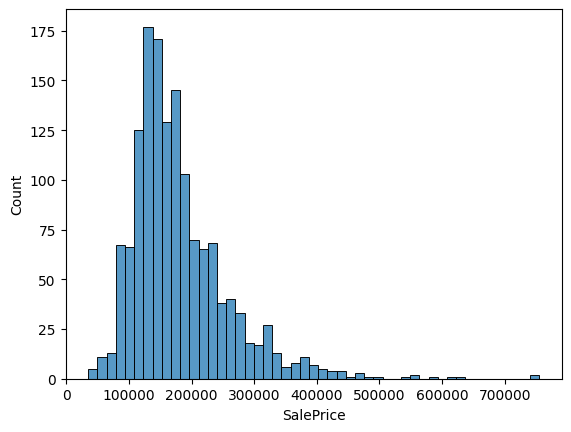

In [231]:
# plot target 
sn.histplot(target)

In [232]:
# select numeric columns
num_data = house_data1[house_data1.select_dtypes(include='number').columns]
print(f"There are {num_data.shape[1]} features in house_data1")

There are 37 features in house_data1


In [ ]:
house_data1.describe(include = "number")


In [ ]:
#categorical columns 
cat_data = house_data1[house_data1.select_dtypes('object').columns]
print(f"There are {cat_data.shape[1]} categorical features in cat_data")

In [ ]:
house_data1.describe(include = "object")

## Missing values 

In [ ]:
# categorical features
na_catCols = cat_data.columns[cat_data.isna().mean() !=0.0].tolist()
cat_data[na_catCols].isna().mean()

In [ ]:
na_catCols = cat_data.columns[cat_data.isna().mean() >= 0.0].tolist()
cat_data[na_catCols].isna().mean()

These features have NA's proportion above 0.3. How to deal with that ?

In [ ]:
# numerical features with na or missing values prop >=0.3
na_numCols = num_data.columns[num_data.isnull().mean()> 0.0].tolist()
num_data[na_numCols].isna().mean()

These 3 columns has NAs. How to deal with that?

In [ ]:
na_features = [na_catCols,na_numCols]

In [ ]:
X = house_data1
y = house_data1.Alley

In [ ]:
y[y.isna()].index

In [ ]:
def rf_impute(X,y):
    # features selection 
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.datasets import make_regression
    Data = pd.DataFrame(np.array(X,y))
    X_train = X.loc[y !="NaN"].dropna(axis=1)
    X_test = X.loc[y.isna()]
    y_train = y.dropna()
    y_test = y[y.isna()]
    
    #y_imp = y.index(y.isna)
    X, y_train = make_regression(
                           n_features=X.shape[1], 
                           n_informative=7,
                           random_state=0,
                           shuffle=False,)
    regr = RandomForestRegressor(max_depth=3, random_state=0)
    regr.fit(X_train, y_train)
    return regr.predict(X_test)

In [ ]:
#rf_impute(X,y)

TODO add cond in loop for imputing 

In [ ]:
# NA propoortion in house_data1
house_data1.isna().mean().mean()

In [ ]:
# fill with mode : doesn't change anything 
#for feature in house_data1.columns:
    #if type(feature) == "object":
        #house_data1[feature].fillna(stats.mode(house_data1[feature]))
    #if type(feature) == "numeric" :
        #house_data1[feature].fillna(stats.median(house_data1[feature]))
# is not convenient : the most common values for rooms for e.g might not be the right one for 
#any house presenting missing value 

# maybe imputing by a model is a better bet ! TODO 


In [ ]:
house_data1.isna().mean().mean()

There is almost 7% of missing value in dataset, we will get rid of it first

## Features selection

In [ ]:
# drop features with na prop > 0.2
house_data2 = house_data1.drop(na_catCols,axis=1)
print(f"house_data2 has shape {house_data2.shape}")

In [ ]:
house_data2.isna().mean().mean()

In [ ]:
#drop features  with Nas 
house_data3 = house_data2.dropna(axis = 1)
print(f"house_data3 shape :{house_data3.shape}")

In [ ]:
# missing values check
if house_data3.isna().mean().sum() == 0.0 :
    print("There is no missing value in house_data3")
else:
    print("missing values still in house_data3")

### note : we might also impute missing values  with random forest for example !

In [ ]:
prop = 1 - round(house_data3.shape[1]/house_data.shape[1],2)
print("Removed features proportion is {}, though, we get rid of {}% of \
potential information 🤔".format(prop,prop*1e2)) 

In [ ]:
# delete useless df
del house_data ,house_data1, house_data2

In [ ]:
# features selection 
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X = house_data3
y = target
X, y = make_regression(
                       n_features=X.shape[1], 
                       n_informative=7,
                       random_state=0,
                       shuffle=False,)
regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(X, y)
#print(regr.predict([[0, 0, 0, 0]]))


In [ ]:
forest_importances = pd.Series(regr.feature_importances_,index = house_data3.columns)
#fig, ax = plt.subplots()
forest_importances.sort_values(ascending= False)[:6]

In [ ]:
house_data4 = house_data3[forest_importances.sort_values(ascending= False).index[:6]]

In [ ]:
# plot features importance (forest importance) 
forest_importances.sort_values(ascending= False)[:6].plot.bar()

To be continued 😉...